In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('data/cleansed_df_v2.csv')
df_test = pd.read_csv('data/cleansed_df_test_v2.csv')

C:\Users\JuNoe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 불필요한 컬럼 제거

In [3]:
df_train.drop(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'fullVisitorId', 'visitId'], axis=1, inplace = True)
df_test.drop(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'fullVisitorId', 'visitId'], axis=1, inplace = True)

### totalTransactionRevenue 달러단위 변환

In [4]:
df_train['totals.totalTransactionRevenue'] = df_train['totals.totalTransactionRevenue']/1000000
df_test['totals.totalTransactionRevenue'] = df_test['totals.totalTransactionRevenue']/1000000

In [5]:
df_train['totals.totalTransactionRevenue'].max()

47082.06

In [6]:
# df_train.to_csv('preprocessed_train.csv')
# df_test.to_csv('preprocessed_test.csv')

In [7]:
df_train

,channelGrouping,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,...,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType
0,Organic Search,1,1508198450,Firefox,Windows,False,desktop,Europe,Western Europe,Germany,...,(not set),google,organic,water bottle,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,6,1508176307,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,...,(not set),sites.google.com,referral,NaN,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN
2,Direct,1,1508201613,Chrome,Android,True,mobile,Americas,Northern America,United States,...,(not set),(direct),(none),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,1,1508169851,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,1,1508190552,Chrome,Windows,False,desktop,Americas,Central America,Mexico,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708332,Social,1,1483554750,Chrome,Windows,False,desktop,Americas,Caribbean,Puerto Rico,...,(not set),youtube.com,referral,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN
1708333,Social,1,1483543798,Chrome,Android,True,mobile,Asia,Southern Asia,Sri Lanka,...,(not set),youtube.com,referral,NaN,/yt/about/,NaN,NaN,NaN,NaN,NaN
1708334,Social,1,1483526434,Android Webview,Android,True,mobile,Asia,Eastern Asia,South Korea,...,(not set),youtube.com,referral,NaN,/yt/about/ko/,NaN,NaN,NaN,NaN,NaN
1708335,Social,1,1483592864,Chrome,Windows,False,desktop,Asia,Southeast Asia,Indonesia,...,(not set),facebook.com,referral,NaN,/l.php,NaN,NaN,NaN,NaN,NaN


In [8]:
len(df_train.dtypes)

29

### 변수 탐색

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 29 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   channelGrouping                               object 
 1   visitNumber                                   int64  
 2   visitStartTime                                int64  
 3   device.browser                                object 
 4   device.operatingSystem                        object 
 5   device.isMobile                               bool   
 6   device.deviceCategory                         object 
 7   geoNetwork.continent                          object 
 8   geoNetwork.subContinent                       object 
 9   geoNetwork.country                            object 
 10  geoNetwork.region                             object 
 11  geoNetwork.metro                              object 
 12  geoNetwork.city                               object 
 1

In [10]:
df_train['device.isMobile'].unique()

array([False,  True])

In [11]:
df_train['totals.pageviews'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  20.,  19.,  21.,  23.,
        22.,  26.,  28.,  25.,  31.,  27.,  24.,  29.,  30.,  32.,  33.,
        42.,  38.,  53.,  40.,  62.,  61.,  54.,  60., 111.,  98.,  34.,
        35.,  36.,  37.,  39.,  43.,  45.,  47.,  52.,  44.,  50.,  49.,
        46.,  51.,  56.,  59.,  71.,  57.,  82.,  84.,  92.,  90.,  68.,
       115.,  nan,  41.,  79., 138.,  48.,  69., 112.,  65.,  63.,  58.,
        74., 165., 100.,  85.,  55.,  70.,  80.,  78.,  72., 188.,  73.,
        75.,  86., 197.,  76.,  67., 102., 148.,  64., 103., 144.,  81.,
       119.,  66., 104., 128., 230.,  87., 152., 101.,  94.,  83., 135.,
        91.,  99., 118., 107., 140., 108.,  77., 202., 127.,  93., 106.,
       155., 117.,  89., 143., 105.,  95., 110., 137., 125., 120., 116.,
       208., 126., 400., 333.,  97.,  96., 113., 327., 154., 121., 183.,
       123., 141., 224.,  88., 157., 195., 343., 19

In [12]:
df_train['totals.sessionQualityDim'].unique()

array([  1.,   2.,   3.,   4.,   6.,   8.,   5.,   7.,  11.,  13.,   9.,
        10.,  49.,  52.,  22.,  54.,  31.,  28.,  60.,  35.,  30.,  32.,
        41.,  19.,  25.,  15.,  24.,  62.,  12.,  14.,  17.,  38.,  63.,
        16.,  23.,  42.,  21.,  18.,  48.,  40.,  73.,  53.,  61.,  36.,
        67.,  47.,  72.,  77.,  58.,  45.,  26.,  75.,  68.,  59.,  43.,
        80.,  46.,  74.,  76.,  66.,  81.,  82.,  70.,  27.,  56.,  50.,
        88.,  39.,  44.,  85.,  55.,  79.,  64.,  93.,  83.,  78.,  86.,
        65.,  69.,  84.,  71.,  51.,  nan,  34.,  20.,  57.,  37.,  29.,
        90.,  87.,  92.,  91.,  96.,  33.,  89.,  94.,  95.,  97.,  99.,
        98., 100.])

In [13]:
df_train['totals.timeOnSite'].unique()

array([  nan,   28.,   38., ..., 4665., 5381., 8811.])

In [14]:
df_train['totals.transactions'].unique()

array([nan,  1.,  2.,  3.,  4.,  8.,  7.,  5.,  6., 10., 21., 25., 12.,
       15.])

In [15]:
df_train['trafficSource.adwordsClickInfo.page'].unique()

array([nan,  1.,  3.,  2.,  5.,  6.,  4., 14.,  7.,  8.,  9., 12.])

In [16]:
df_train['visitNumber'].unique()

array([  1,   6,   2,  10,   3,   4,  14,  11,   7,  15,  17,   5,  13,
        16,   8,  34,  21,  18,  28,   9,  12,  29, 138,  36,  30, 102,
        20,  54,  33,  57,  19,  45,  27,  39,  43,  25,  26,  23,  31,
        99, 100, 101,  46,  24,  22,  56,  83,  38,  84,  42,  89, 136,
        85, 105,  48,  93,  50,  64,  94,  70,  98, 149,  72,  69,  35,
       124, 178,  59, 317,  51, 160,  52,  63,  47,  49,  88, 140,  91,
        92,  41,  74, 309,  61,  32, 108, 195, 162, 235,  90,  86, 236,
       158,  82, 159, 148, 125,  55,  66, 401,  65,  40,  60,  58, 137,
       126, 112, 155,  96,  73,  78,  97,  87,  76,  77, 304, 107, 106,
       389,  68, 132, 266, 267, 221, 143, 104, 142, 245, 174, 121, 175,
       191, 190, 189, 204,  37, 206, 156, 157,  62, 110, 109, 184, 183,
       169, 163, 150, 147, 113, 164,  44, 194, 193, 254,  71,  53, 145,
       144, 146,  80, 253, 222, 223,  81, 128, 192, 129, 161, 152, 324,
       134, 135, 130,  95,  75, 103, 315, 154, 153, 283, 117, 18

In [17]:
df_train['visitStartTime'].unique()

array([1508198450, 1508176307, 1508201613, ..., 1483526434, 1483592864,
       1483574474], dtype=int64)

In [18]:
df_train['totals.hits'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  43,  45,  46,  47,  50,  52,  56,  58,  62,  66,  69,
        74,  75,  85,  90,  93,  94, 138, 165,  42,  44,  48,  49,  51,
        54,  55,  57,  65,  67,  72,  79,  82,  83,  92, 103, 109, 134,
       143, 144,  53,  61,  70, 106, 137,  73, 112, 189,  63,  81,  91,
       102, 161,  86,  99,  80,  89, 100,  71,  76,  77,  95, 229,  64,
       154,  78,  84,  87,  97, 104, 108, 115, 119, 136,  60,  68,  96,
       107, 110, 113, 147, 331,  59,  98, 303, 179, 146, 218, 101, 149,
       114, 156, 105,  88, 116, 141, 175, 111, 241, 298, 224, 120, 145,
       183, 227, 126, 148, 181, 155, 215, 187, 130, 176, 202, 121, 122,
       207, 117, 140, 193, 302, 142, 196, 201, 133, 159, 167, 125, 131,
       150, 168, 311, 127, 249, 500, 118, 188, 166, 139, 123, 12

In [19]:
df_train['channelGrouping'].unique()

array(['Organic Search', 'Referral', 'Direct', 'Paid Search', 'Display',
       'Affiliates', 'Social', '(Other)'], dtype=object)

In [20]:
df_train['visitStartTime']

0          1508198450
1          1508176307
2          1508201613
3          1508169851
4          1508190552
              ...    
1708332    1483554750
1708333    1483543798
1708334    1483526434
1708335    1483592864
1708336    1483574474
Name: visitStartTime, Length: 1708337, dtype: int64

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 29 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   channelGrouping                               object 
 1   visitNumber                                   int64  
 2   visitStartTime                                int64  
 3   device.browser                                object 
 4   device.operatingSystem                        object 
 5   device.isMobile                               bool   
 6   device.deviceCategory                         object 
 7   geoNetwork.continent                          object 
 8   geoNetwork.subContinent                       object 
 9   geoNetwork.country                            object 
 10  geoNetwork.region                             object 
 11  geoNetwork.metro                              object 
 12  geoNetwork.city                               object 
 1

### visitStartTime을 시간 컬럼으로 변환

In [22]:
from datetime import datetime
df_train['_visitHour'] = (df_train['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
df_test['_visitHour'] = (df_test['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)

In [23]:
df_train.drop(['visitStartTime'], axis=1, inplace=True)
df_test.drop(['visitStartTime'], axis=1, inplace=True)

### Autogluon용 데이터 저장

In [24]:
filtered_train_rows = df_train['totals.totalTransactionRevenue'] !=0
filtered_test_rows = df_test['totals.totalTransactionRevenue'] != 0

df_train = df_train.loc[filtered_train_rows]
df_test = df_test.loc[filtered_test_rows]

In [25]:
df_train.to_csv('preprocessed_train_Auto.csv')
df_test.to_csv('prerocessed_test_Auto.csv')

In [26]:
len(df_train)

18514

### 종속변수 EDA

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

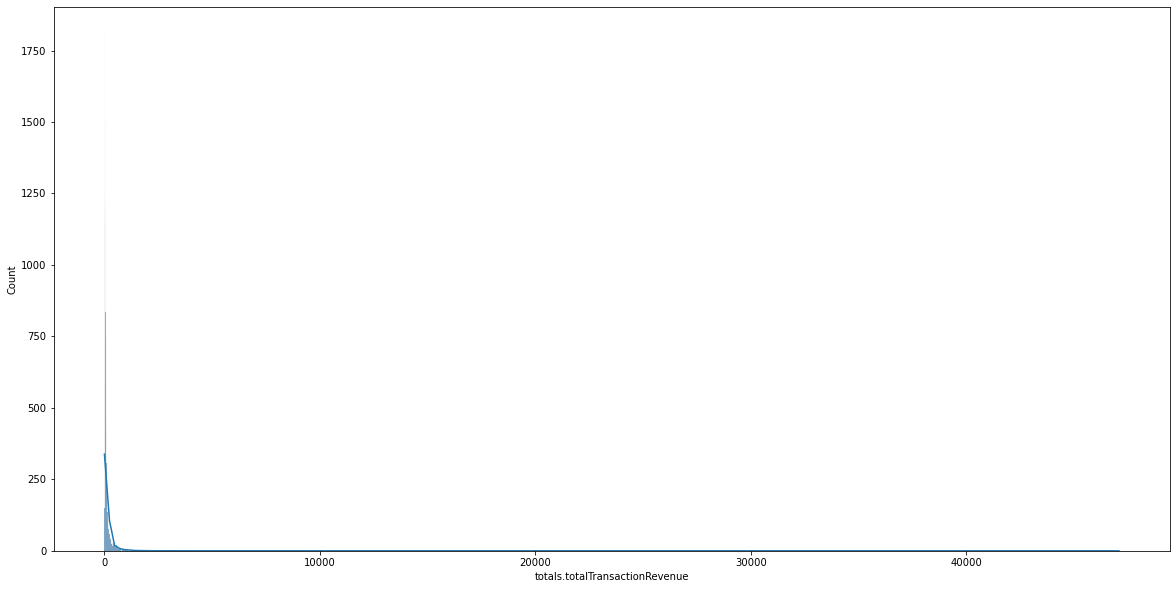

In [28]:
plt.figure(figsize=(20,10))
sns.histplot(data=df_train, x="totals.totalTransactionRevenue", kde=True)
plt.show()


In [29]:
print('Skewness: {:05.2f}'.format(df_train['totals.totalTransactionRevenue'].skew()),
      ' ' , 'Kurtosis: {:06.2f}'.format(df_train['totals.totalTransactionRevenue'].kurt()) )

Skewness: 40.14   Kurtosis: 2264.49


##### right skewed

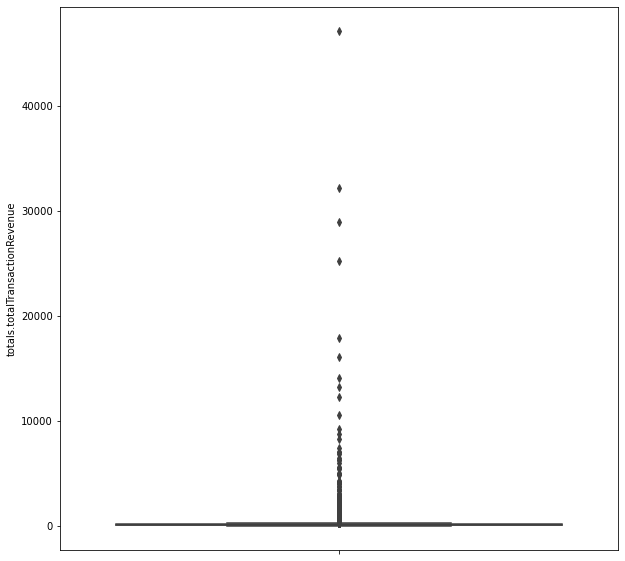

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_train, y='totals.totalTransactionRevenue')
plt.show()

In [31]:
df_train['totals.totalTransactionRevenue'].describe()

count    18514.00000
mean       142.81667
std        645.56436
min          1.20000
25%         28.96000
50%         52.79000
75%        108.96750
max      47082.06000
Name: totals.totalTransactionRevenue, dtype: float64

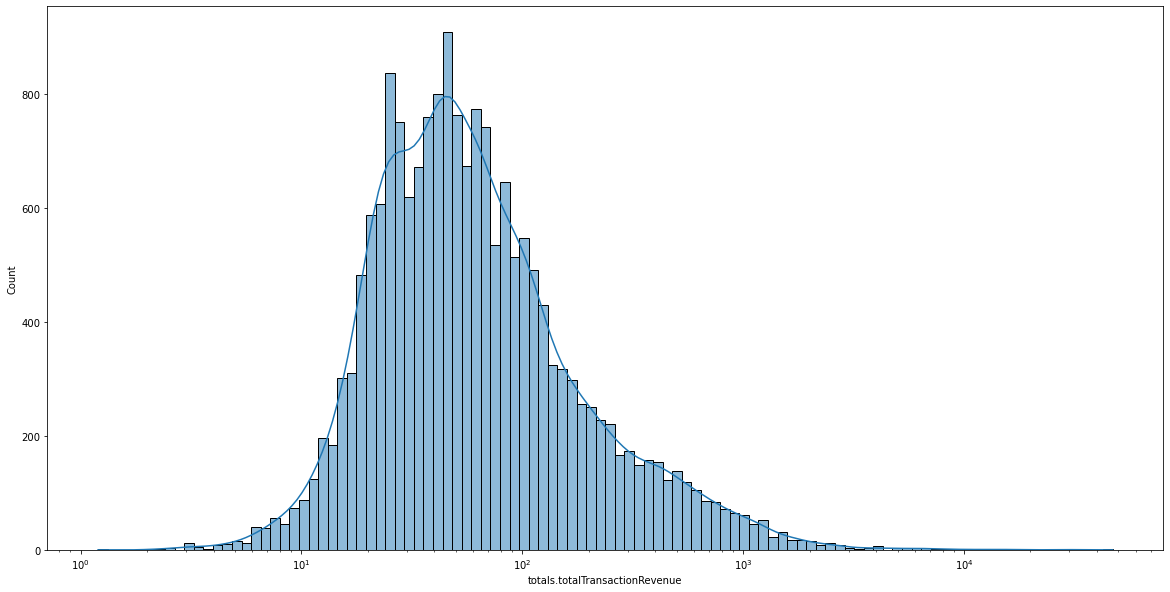

In [32]:
plt.figure(figsize=(20,10))
sns.histplot(data=df_train, x="totals.totalTransactionRevenue", log_scale=True, kde=True)
plt.show()

In [33]:
import numpy as np

<ipython-input-34-a94a6935baf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Log_totals.totalTransactionRevenue'] = np.log1p(df_train['totals.totalTransactionRevenue'])
C:\Users\JuNoe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.851
Kurtosis: 1.155


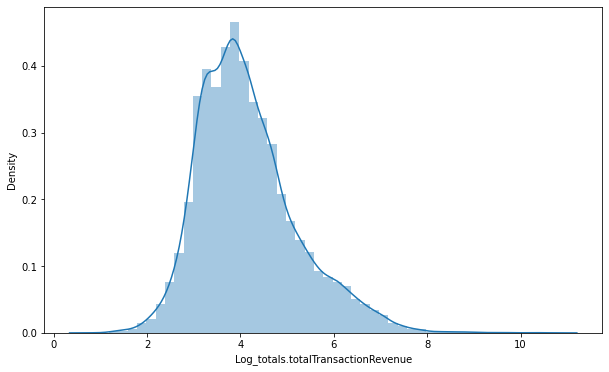

In [34]:
df_train['Log_totals.totalTransactionRevenue'] = np.log1p(df_train['totals.totalTransactionRevenue'])
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(df_train["Log_totals.totalTransactionRevenue"])
print("Skewness: {:.3f}".format(df_train["Log_totals.totalTransactionRevenue"].skew())) 
print("Kurtosis: {:.3f}".format(df_train["Log_totals.totalTransactionRevenue"].kurt()))

##### 정규성 기준  :  |왜도| < 3, |첨도| < 8 by Kline(2005)

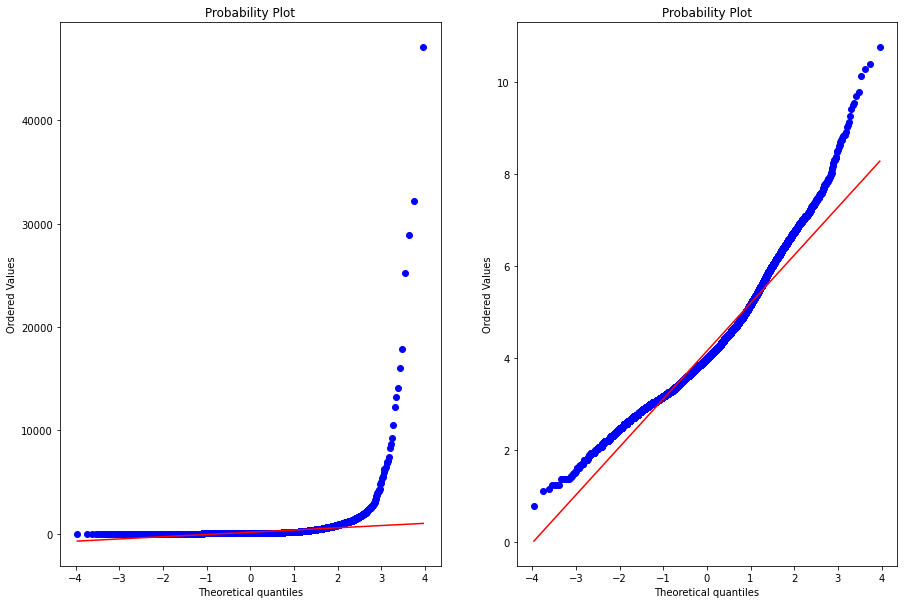

In [35]:
from scipy import stats 

fig = plt.figure(figsize = (15,10)) 
fig.add_subplot(1,2,1) 
res = stats.probplot(df_train["totals.totalTransactionRevenue"], plot=plt) 
fig.add_subplot(1,2,2) 
res = stats.probplot(df_train["Log_totals.totalTransactionRevenue"], plot=plt)

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18514 entries, 433 to 1708001
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   channelGrouping                               18514 non-null  object 
 1   visitNumber                                   18514 non-null  int64  
 2   device.browser                                18514 non-null  object 
 3   device.operatingSystem                        18514 non-null  object 
 4   device.isMobile                               18514 non-null  bool   
 5   device.deviceCategory                         18514 non-null  object 
 6   geoNetwork.continent                          18514 non-null  object 
 7   geoNetwork.subContinent                       18514 non-null  object 
 8   geoNetwork.country                            18514 non-null  object 
 9   geoNetwork.region                             18514 non-n

In [37]:
df_train['trafficSource.referralPath'].value_counts()

/                                                                                     8257
/mail/u/0/                                                                              83
/offer/2145                                                                             80
/a/google.com/forum/                                                                    41
/a/google.com/googletopia/discounts-deals-and-free-stuff/alphabet-google-discounts      37
                                                                                      ... 
/r/chromeos/comments/39boco/looking_for_chrome_sticker/                                  1
/xud9jul6em                                                                              1
/neo/rd                                                                                  1
/yt/about/brand-resources/                                                               1
/yt/about/en-GB/                                                                         1

In [38]:
df_train['trafficSource.referralPath'].unique()

array([nan, '/',
       '/a/google.com/google-merchandise-store/home/on-site-store',
       '/permissions/using-the-logo.html',
       '/_/scs/mail-static/_/js/k=gmail.main.en.sXDiEpUnPe0.O/m=m_i,t,it/am=nhGvDGD-3_uDcQ3DgK701brz33u-Xyo_e7nH_ycDROlVoP_N_h_A_4H-tI0C/rt=h/d=1/rs=AHGWq9Bm-1qj1hhkb8cG9EpeilyYgWjoxA',
       '/a/google.com/google-merchandise-store/on-site-store',
       '/offer/2145', '/mail/u/0/', '/yt/about/',
       '/deal/-ds-sign-up-for-google-merchandise-store-emails-for-special-coup-c179',
       '/a/google.com/googletopia/discounts-deals-and-free-stuff/alphabet-google-discounts',
       '/webmail/en-us/tablet', '/a/google.com/forum/',
       '/external-link.jspa', '/2015/03/11/google-merch-store-new-url/',
       '/a/google.com/google-merchandise-store/on-site-store/mountain-view-store',
       '/a/google.com/google-merchandise-store/newsite/on-site-store/mountain-view-store',
       '/google-merchandise-store',
       '/r/chromeos/comments/39boco/looking_for_chrome_